## Multi-Layer Perceptron, MNIST (TensorFlow)

- [참고 링크](https://codetorial.net/tensorflow/mnist_classification.html)

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.9.2


### 1. keras에서 MNIST 데이터 불러오기

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
# 신경망 모델에 주입하기 전에 값의 범위를 0~1로 조정

train_images = train_images / 255.0
test_images = test_images / 255.0

### 2. MLP 아키텍쳐 만들기

In [6]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


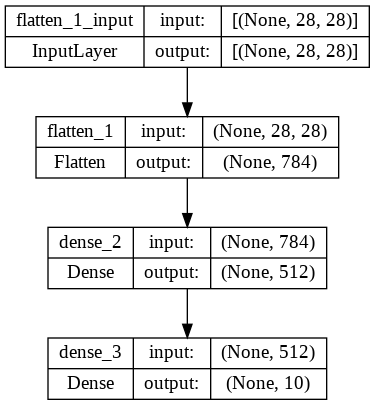

In [7]:
keras.utils.plot_model(model, show_shapes=True)

### 3. 모델 학습하기

- Loss function
- Optimizer

In [8]:
model.compile(optimizer='adam', # SGD, SGD + momentum
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=30)

Epoch 1/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4748 - accuracy: 0.8302
Epoch 2/30
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3578 - accuracy: 0.8684
Epoch 3/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3211 - accuracy: 0.8822
Epoch 4/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2984 - accuracy: 0.8896
Epoch 5/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2779 - accuracy: 0.8980
Epoch 6/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2646 - accuracy: 0.9014
Epoch 7/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2524 - accuracy: 0.9055
Epoch 8/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2394 - accuracy: 0.9103
Epoch 9/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2300 - accuracy: 0.9136
Epoch 10/30
1875/1875 [==============================] - 11s 6ms/step - l

### 4. 모델 성능 테스트하기

In [9]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1)

print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.4312 - accuracy: 0.8868
Test loss: 0.4312070906162262
Test accuracy: 0.8867999911308289
